<a href="https://colab.research.google.com/github/chakri970/Stock-Market-Prediction/blob/main/lstmnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/mine/all_stocks_5yr.csv"
df=pd.read_csv(path)
df.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tsla_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mine/all_stocks_5yr.csv',
                        names=['date', 'open', 'high', 'low', 'close','volume','Name'],
                        header=0)

# Extracting the close price from the DataFrame
tsla_close = tsla_data['close'].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
tsla_close = tsla_close.reshape(-1, 1)
tsla_close = scaler.fit_transform(tsla_close)

In [ ]:
train_size = int(len(tsla_close) * 0.8)
test_size = len(tsla_close) - train_size
X_train, Y_train = tsla_close[0:train_size, :], tsla_close[1:train_size+1, :]
X_test, Y_test = tsla_close[train_size:len(tsla_close), :], tsla_close[train_size+1:len(tsla_close), :]

def create_dataset(data, lookback=1):
    X, Y = [], []
    for i in range(len(data) - lookback - 1):
        a = data[i:(i + lookback), 0]
        X.append(a)
        Y.append(data[i + lookback, 0])
    return np.array(X), np.array(Y)

lookback = 1
X_train, Y_train = create_dataset(X_train, lookback)
X_test, Y_test = create_dataset(X_test, lookback)

# Reshaping the arrays into 3D arrays
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping to prevent wasting time
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Training with early stopping and bigger batch size
history = model.fit(X_train, Y_train, epochs=30, batch_size=128, verbose=2, callbacks=[early_stop])

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
3869/3869 - 22s - 6ms/step - loss: 6.1846e-05
Epoch 2/30
3869/3869 - 18s - 5ms/step - loss: 8.0143e-06
Epoch 3/30
3869/3869 - 21s - 5ms/step - loss: 8.3463e-06
Epoch 4/30
3869/3869 - 18s - 5ms/step - loss: 8.2689e-06
Epoch 5/30
3869/3869 - 21s - 5ms/step - loss: 7.8593e-06
Epoch 6/30
3869/3869 - 18s - 5ms/step - loss: 8.1756e-06
Epoch 7/30
3869/3869 - 22s - 6ms/step - loss: 8.0039e-06
Epoch 8/30
3869/3869 - 19s - 5ms/step - loss: 7.9367e-06
Epoch 9/30
3869/3869 - 21s - 5ms/step - loss: 8.0302e-06
Epoch 10/30
3869/3869 - 21s - 6ms/step - loss: 7.8149e-06
Epoch 11/30
3869/3869 - 19s - 5ms/step - loss: 7.7812e-06
Epoch 12/30
3869/3869 - 18s - 5ms/step - loss: 7.9160e-06
Epoch 13/30
3869/3869 - 20s - 5ms/step - loss: 7.8758e-06
Epoch 14/30
3869/3869 - 22s - 6ms/step - loss: 7.9488e-06
Epoch 15/30
3869/3869 - 19s - 5ms/step - loss: 7.7093e-06
Epoch 16/30
3869/3869 - 21s - 5ms/step - loss: 7.7565e-06
Epoch 17/30
3869/3869 - 20s - 5ms/step - loss: 7.7053e-06
Epoch 18/30
3869/3869 -

In [ ]:
scaler.fit(tsla_close.reshape(-1, 1))
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1,1))

In [ ]:
train_mae = np.mean(abs(train_predict - Y_train))
test_mae = np.mean(abs(test_predict - Y_test))
print('Training MAE:', train_mae)
print('Testing MAE:', test_mae)

Training MAE: 0.0005975487516342582
Testing MAE: 0.0005598049302955101


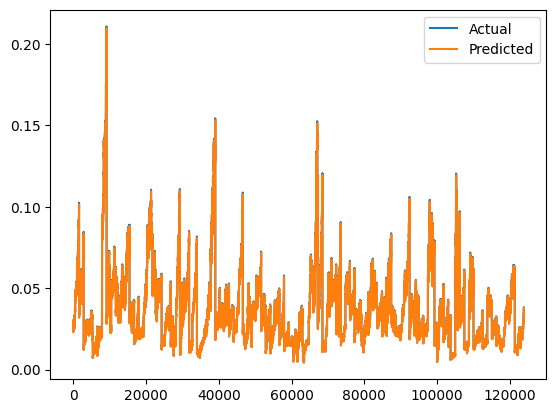

In [ ]:
plt.plot(Y_test, label = 'Actual')
plt.plot(test_predict, label = 'Predicted')
plt.legend()
plt.show()

In [ ]:
# Get the latest close price
latest_close = tsla_close[-1]

# Normalize the latest close price
latest_close = latest_close.reshape(1, -1)
latest_close = scaler.transform(latest_close)

# Reshape the latest close price into a 3D array
latest_close = np.reshape(latest_close, (1, lookback, 1))

# Predict the close price for tomorrow
tomorrow_predict = model.predict(latest_close)

# Invert the normalized prediction back to the original scale
tomorrow_predict = scaler.inverse_transform(tomorrow_predict)

# Print the prediction
print("Predicted close price for tomorrow: ", tomorrow_predict[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted close price for tomorrow:  0.034902938


In [ ]:
scaler.fit(tsla_close.reshape(-1, 1))
predicted_price = scaler.inverse_transform(np.array([[0.34591573]]))
print("Predicted close price for tomorrow: ", predicted_price[0][0])


Predicted close price for tomorrow:  0.3459157299999999


In [ ]:
# Get the latest actual value
latest_actual = Y_test[-1]
print("Latest actual close price: ", latest_actual)

Latest actual close price:  [0.03501009]


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)